# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

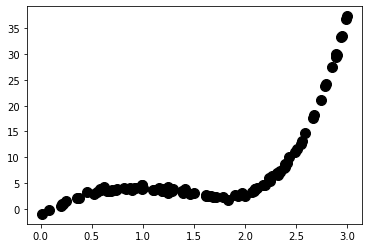

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 0.09910315,  1.87054424,  7.38056674,  7.0003952 , 10.94063607,
       11.46333133,  8.98866925, -0.90493008,  1.08596347, -0.28615618,
       -0.38414561, -0.89535091,  0.45494548, -1.01644184,  1.25970946,
       -0.88858051,  0.71632331, -0.80441691,  9.98851501, -0.42684644,
       12.21929664,  2.60948893,  2.6621384 , 25.01778052, -0.55952093,
       19.00014416,  5.47554705,  1.6403462 ,  0.1916741 , -0.63920525,
       13.325206  , -0.74078945, -0.89061402,  9.50540372, 27.94909538,
       -1.03451968, -0.36654205, -0.90368726, -0.90951479,  4.90200593])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.6679090580427911
Explained variance score: 0.6679090580427911
Median absolute error: 3.9633371146974516
Mean squared error: 17.774909891422546
Mean absolute errors: 3.7653112285770307


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [8]:
for i in [1,2,3,4,5,25]:
    model = make_pipeline(PolynomialFeatures(i), linear_model.LinearRegression())
    model.fit(X_train, y_train)
    print(f"Regresja stopnia {i}")
    print(model.predict(X_test))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print()

Regresja stopnia 1
[ 1.25683253 -0.42435979 11.67968488 11.50547717 13.15052069 13.34688987
 -4.26547723  3.10848729  7.88281679  6.32938974  6.1753417   5.03667947
  0.84760248  4.41097548  8.03651663  3.05062313  0.57755054  5.31677084
 12.78147353  6.1045926  13.62376877 -0.96182359  9.10878687 17.47032793
  2.24362245 15.81945401 10.76141355  8.35407192  6.96601974  2.40248714
 14.01496055  2.63046758  5.05321293 12.58811497 18.20490845  4.01615549
  1.90702015  3.10396513  3.12535951 10.45921351]
Mean squared error: 30.641730306203918

Regresja stopnia 2
[ 0.09910315  1.87054424  7.38056674  7.0003952  10.94063607 11.46333133
  8.98866925 -0.90493008  1.08596347 -0.28615618 -0.38414561 -0.89535091
  0.45494548 -1.01644184  1.25970946 -0.88858051  0.71632331 -0.80441691
  9.98851501 -0.42684644 12.21929664  2.60948893  2.6621384  25.01778052
 -0.55952093 19.00014416  5.47554705  1.6403462   0.1916741  -0.63920525
 13.325206   -0.74078945 -0.89061402  9.50540372 27.94909538 -1.03451